In [6]:
#Download the cleaned dataset created from previous note book and uploaded to G-drive

!gdown 1vDvFht8JDMfD__eG5-nGNtXaV08qxkcv

Downloading...
From: https://drive.google.com/uc?id=1vDvFht8JDMfD__eG5-nGNtXaV08qxkcv
To: /content/Scaled_credit_score_with_all_features.csv
100% 8.43M/8.43M [00:00<00:00, 72.3MB/s]


In [2]:
# libraries to analyze data
import numpy as np
import pandas as pd

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# libraries to perform stats
import scipy.stats as stats

In [7]:
# read the file
cs_df = pd.read_csv('/content/Scaled_credit_score_with_all_features.csv', encoding='unicode_escape')
cs_df.head(5)

,Customer_ID,Month,Age,Occupation,Debt_to_Income_Ratio_Score,Monthly_Bal_to_Income_Ratio_Score,Monthly_debt_to_Income_Ratio_Score,Monthly_Invest_to_Income_Ratio_Score,Monthly_Other_Expense_to_Income_Ratio_Score,Credit_History_Years_Ratio_Score,...,Payment_of_Min_Amount_Score,Credit_Utilization_Ratio_Score,Num_Credit_Inquiries_Score,Changed_Credit_Limit_Score,Interest_Rate_Score,Num_Credit_Card_Score,Credit_Mix_Score,Monetary_Score,Behaviour_Score,Credit_Avail_Score
0,CUS_0xd40,January,23,Scientist,10,2,10,1,3,7,...,10,8,9,7,10,9,10,26,58.0,45
1,CUS_0xd40,February,23,Scientist,10,2,10,1,3,7,...,10,7,9,7,10,9,10,26,58.0,45
2,CUS_0xd40,March,23,Scientist,10,2,10,1,3,7,...,10,8,9,7,10,9,10,26,59.0,45
3,CUS_0xd40,April,23,Scientist,10,2,10,1,3,7,...,10,7,9,7,10,9,10,26,59.0,45
4,CUS_0xd40,May,23,Scientist,10,2,10,1,3,7,...,10,8,9,7,10,9,10,26,57.0,45


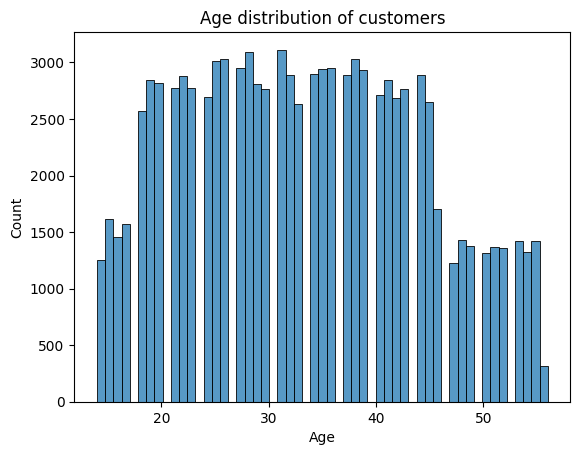

In [8]:
sns.histplot(data=cs_df['Age'])
plt.title("Age distribution of customers")
plt.show()

**Insight**

Customers with in the Age group of 18 - 45 are high

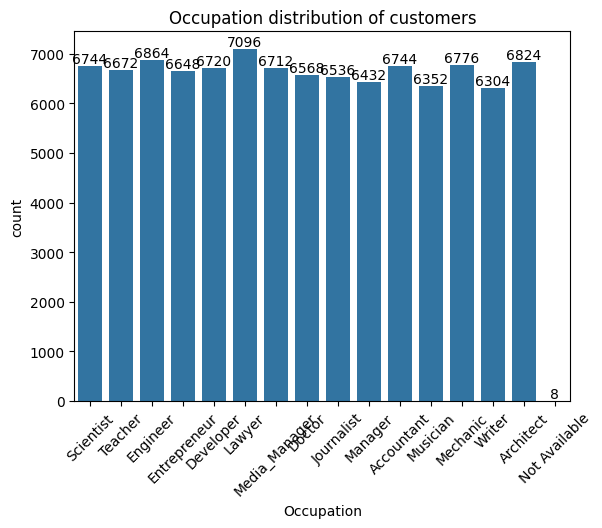

In [9]:
ax = sns.countplot(data=cs_df, x='Occupation')
for container in ax.containers:
  ax.bar_label(container)
plt.xticks(rotation=45)
plt.title("Occupation distribution of customers")
plt.show()

**Insights**

* Occupation Developer is the maximum customers in the given data.
* Occupation Writer is the minimum customer in the given data.
* Occupations Scientists, Entrepreneur, Media Manager, Manager, Musician are almost equally present in the given data.
* Occupations Engineer and Architect are almost equally present in the given data.



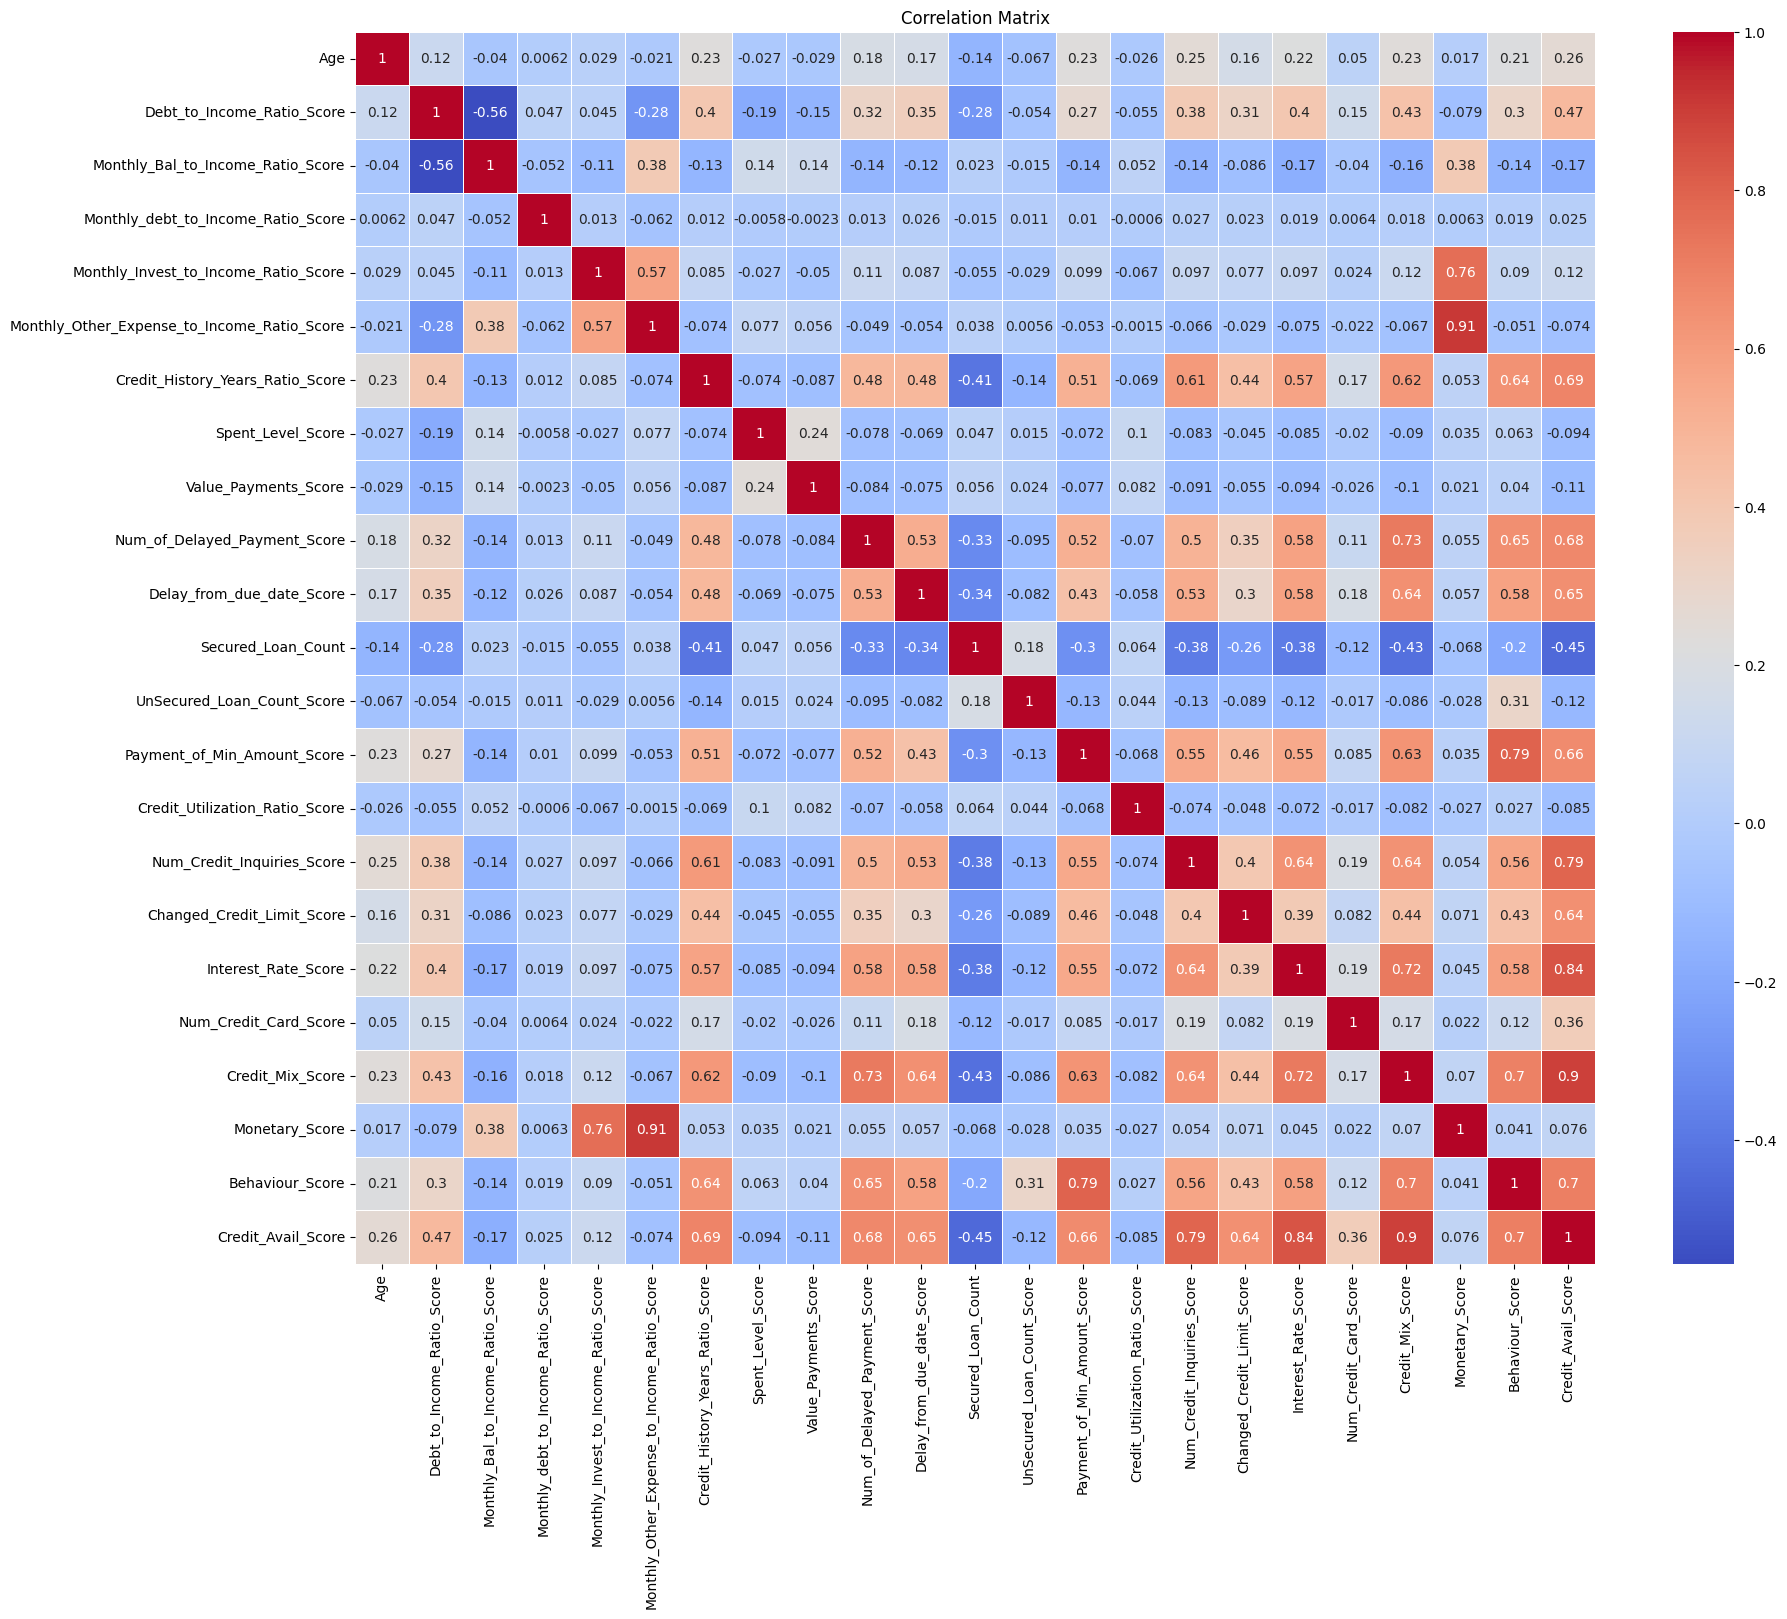

In [12]:
# Select only numeric columns
numeric_df = cs_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**Insights:**

* Monetary Score and Monthly Invest to Income Ratio Score are tightly correlated
* Interest Rate Score and Credit Avail Score are tightly correlated
* Credit Mix Score and Credit Avail Score are tightly correlated

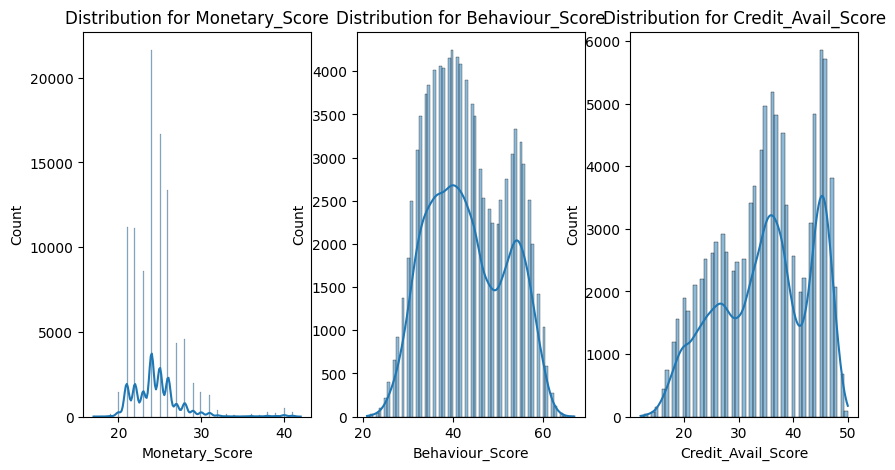

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(10,5))
sns.histplot(ax = axs[0], data=cs_df, x = 'Monetary_Score',  kde=True).set_title('Distribution for Monetary_Score')
sns.histplot(ax = axs[1], data=cs_df, x = 'Behaviour_Score', kde=True).set_title('Distribution for Behaviour_Score')
sns.histplot(ax = axs[2], data=cs_df, x = 'Credit_Avail_Score', kde=True).set_title('Distribution for Credit_Avail_Score')
plt.show()

**Insights:**

* The monetary score is high during the early stages of availing credit i.e., age 20 - 30 may be customers are more discipline during the early cycles. The reasons could be to build good credit score, fear of default can have implications in the future.

* The behavior score is almost distributed like normal.

* The Credit Avail Score is high during late stages of availing credit i.e., 35 - 50 years. It could be because of higher income, existing credit score built over the years contribution.